# Demo of pytikz, a Python interface to Ti*k*Z

The import package is called `tikz`. For interactive use, importing the contents into the current namespace is more convenient.

In [1]:
from tikz import *

## Using `Picture` objects to create graphics

Example graphic from the manual, [Part I](https://pgf-tikz.github.io/pgf/pgfmanual.pdf#part.1)

Creating a graphic always involves creating a `Picture` object and performing operations on it. Here, the `draw()` method accepts a path specification (determines what to draw) as well as options (determine how to draw).

In [2]:
# define coordinates as a list of tuples
coords = [(0, 0), (0, 2), (1, 3.25), (2, 2), (2, 0), (0, 2), (2, 2), (0, 0), (2, 0)]

# create `Picture` object
pic = Picture()
# draw a line following the coordinates
pic.draw(line(coords), thick=True, rounded_corners='4pt')

Evaluating the `Picture` object in the notebook renders the graphic as a PNG and embeds it in the notebook.

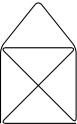

In [3]:
pic

The method `code()` returns the LaTeX/TikZ code of the `Picture` object, which is a `tikzpicture` environment. The same method is present on all objects that represent parts of the graphics. Notice how the structure of the Python code mimics that of the TikZ code.

In [4]:
print(pic.code())

\begin{tikzpicture}
\draw[thick,rounded corners=4pt] (0,0) -- (0,2) -- (1,3.25) -- (2,2) -- (2,0) -- (0,2) -- (2,2) -- (0,0) -- (2,0);
\end{tikzpicture}


The method `demo()` of a `Picture` object shows both the rendered graphic and the underlying code in the notebook. It takes an optional argument `dpi` to specify the rendering resolution. It is intended to be used during development and debugging of a picture.


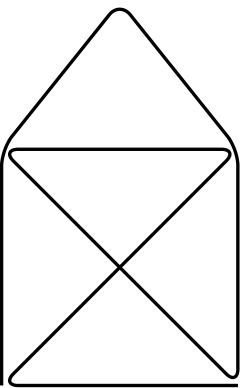

In [5]:
pic.demo(dpi=300)

The method `document_code()` of a `Picture` object returns the complete LaTeX/TikZ code used to render the graphic. When a graphic is rendered, internally this code is written to a temporary file and compiled with (pdf/Xe/Lua) LaTeX. The resulting PDF is read and can be either saved (using the method `write_image()`) or rastered for display in the notebook. A rastered version can also be saved.

## A picture for Karl's students

Based on the code developed in the first tutorial of the manual, [§2](https://pgf-tikz.github.io/pgf/pgfmanual.pdf#section.2).


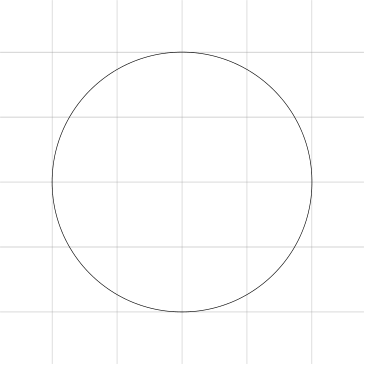

In [6]:
pic = Picture(scale=3, line_cap='round')

## define styles
pic.style('important line', very_thick=True)

# define colors
pic.colorlet('anglecolor', 'green!50!black')
pic.colorlet('sincolor', 'red')
pic.colorlet('coscolor', 'blue')
pic.colorlet('tancolor', 'orange!80!black')

# background grid
pic.draw((-1.4, -1.4), grid((1.4, 1.4), step='0.5cm'),
    help_lines=True, very_thin=True)

# circle
pic.draw((0, 0), circle(radius=1))

pic.demo(dpi=110)


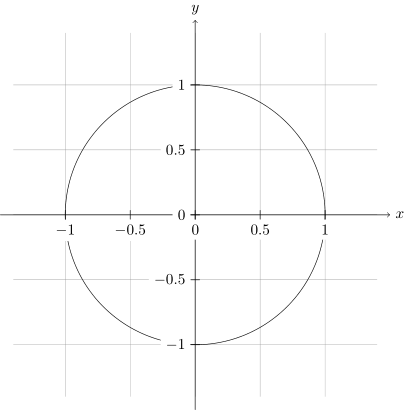

In [7]:
# `scope` environment to contain the axes code
scope = pic.add_scope()

# horizontal axis and label
scope.draw((-1.5, 0), lineto((1.5, 0)), node('$x$', right=True), coordinate(name='x axis'),
    opt='->')

# vertical axis and label
scope.draw((0, -1.5), lineto((0, 1.5)), node('$y$', above=True), coordinate(name='y axis'),
    opt='->')

# ticks and tick labels on horizontal axis
for x in [-1, -0.5, 0, 0.5, 1]:
    scope.draw('(0pt,1pt)', lineto('(0pt,-1pt)'), node(f'${x}$', below=True, fill='white'),
        xshift=f'{x} cm')

# ticks and tick labels on vertical axis
for y in [-1, -0.5, 0, 0.5, 1]:
    scope.draw('(1pt,0pt)', lineto('(-1pt,0pt)'), node(f'${y}$', left=True, fill='white'),
        yshift=f'{y} cm')

pic.demo(dpi=110)


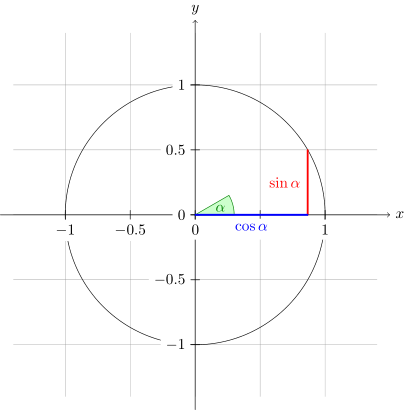

In [8]:
# angle of 30 degrees
pic.path((0, 0), lineto('(3mm,0mm)'), arc(start_angle=0, end_angle=30, radius='3mm'), '--cycle',
    fill='green!20', draw='anglecolor')
# label for angle
pic.draw('(15:2mm)', node(r'$\alpha$', anglecolor=True))

# sine line and label
pic.draw('(30:1cm)', lineto('(30:1cm |- x axis)'),
    node(r'$\sin \alpha$', left='1pt', fill='white', pos=0.5),
    important_line=True, sincolor=True)

# cosine line and label
pic.draw('(30:1cm |- x axis)', lineto((0,0)),
    node(r'$\cos \alpha$', below='2pt', fill='white', pos=0.5),
    important_line=True, coscolor=True)

pic.demo(dpi=110)


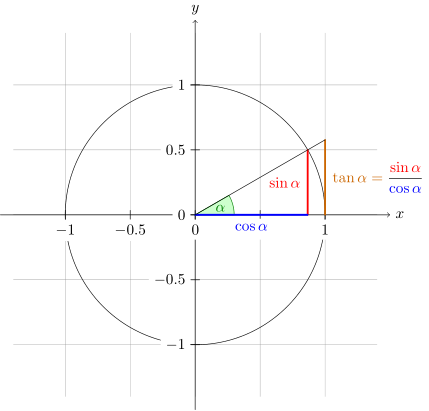

In [9]:
# To determine the top of the tangent line, the intersection of a line at 30 degrees from the origin with a line upwards from (1, 0) is determined
pic.usetikzlibrary('intersections')
pic.path((1, 0), lineto((1, 1)), name_path='upward line')
pic.path((0, 0), lineto('(30:1.5)'), name_path='sloped line')
pic.draw(name_intersections='{of=upward line and sloped line, by=t}')

# tangent line and label
pic.draw((1, 0), lineto('(t)'), node(
            r"""$
            \displaystyle
            \tan \alpha
            \color{black} = \frac{
                \color{red} \sin \alpha}{
                \color{blue} \cos \alpha}
            $""",
            right='1pt', fill='white', pos=0.5),
        tancolor=True, very_thick=True)

# line from the origin to the top of the tangent line
pic.draw((0, 0), lineto('(t)'))

pic.demo(dpi=110)

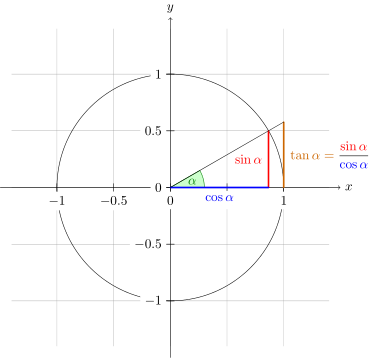

In [10]:
pic

## A logo for pytikz

The logo consists of curved lines shaped like the letters 'p' and 'y', and the text 'TikZ'. Additionally, circles are used to mark the end points of the curved lines.


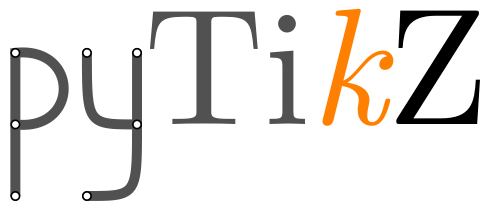

In [11]:
pic = Picture()

# align coordinate system with font metrics
pic.tikzset(x='1ex', y='1ex')

# adjust the space around the contents
pic.clip((-0.215, -1.2), rectangle((6.6, 1.74)))

# style: remove space around node text
pic.style('every node', inner_sep=0, outer_sep=0)

# draw curved lines and text
pic.draw(
    # 'p'
    (0, -1), lineto((0, 1)), curveto((0, 0), control1=(0.9, 1.1), control2=(0.9, -0.1)),
    options(xshift='1ex'),
    # 'y'
    (0, 1), curveto((0.7, 0), control1=(0, 0)),
    (0.7, 1), lineto((0.7, 0)), curveto((0, -1), control1=(0.7, -1)),
    options(xshift='0.8ex'),
    # 'TikZ'
    (0, 0), node(r'Ti\emph{\color{orange}k}Z', anchor='base west'),
    darkgray=True, line_cap='round', semithick=True)

# mark end points of curved lines
pic.draw(
    # points on 'p'
    (0, -1), circle(radius='0.25pt'),
    (0, 1), circle(radius='0.25pt'),
    (0, 0), circle(radius='0.25pt'),
    options(xshift='1ex'),
    # point on 'y'
    (0, 1), circle(radius='0.25pt'),
    (0.7, 0), circle(radius='0.25pt'),
    (0.7, 1), circle(radius='0.25pt'),
    (0, -1), circle(radius='0.25pt'),
    ultra_thin=True, fill='white')

# version for the README
pic.write_image('logo.png', dpi=1200)

# version for the documentation
pic.write_image('docs/logo.png', dpi=1200)

pic.demo(dpi=1200)

## An illustration for the documentation

In [12]:
pic = Picture()

# define colors
pic.colorlet('action', 'red!80!black')
pic.colorlet('coordinate', 'blue!60!black')
pic.colorlet('option', 'violet')
pic.colorlet('operation', 'lime!60!black')

# nodes without padding
pic.style('every node', inner_sep=0, outer_sep=0)

# 'teletype' font for code
pic.tikzset(font=r'\tt')

# create one node for each section of the code
# Each is positioned relative to the previous one, to get continuous text.
pic.node(r'pic', 'a')
pic.node(r'.', 'a2',
    at='(a.base east)', anchor='base west')
pic.node('draw', 'b',
    at='(a2.base east)', anchor='base west', color='action')
pic.node('(', 'c',
    at='(b.base east)', anchor='base west')
pic.node('(-1.4, -1.4)', 'd',
    at='(c.base east)', anchor='base west', color='coordinate')
pic.node(',$~$', 'e',
    at='(d.base east)', anchor='base west')
pic.node('grid', 'f',
    at='(e.base east)', anchor='base west', color='operation')
pic.node('(', 'g',
    at='(f.base east)', anchor='base west')
pic.node('(-1.4, -1.4)', 'h',
    at='(g.base east)', anchor='base west', color='coordinate')
pic.node(',$~$', 'i',
    at='(h.base east)', anchor='base west')
pic.node('step=0.5', 'j',
    at='(i.base east)', anchor='base west', color='option')
pic.node(')', 'k',
    at='(j.base east)', anchor='base west')
pic.node(',$~$', 'k2',
    at='(k.base east)', anchor='base west')
pic.node('help\_lines=True', 'l',
    at='(k2.base east)', anchor='base west', color='option')
pic.node(')', 'm',
    at='(l.base east)', anchor='base west')

pic.demo()


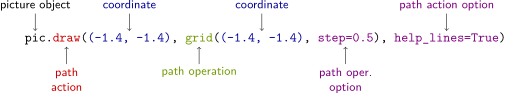

In [13]:
# define arrow styles
# All arrows and annotation are positioned relative to the baseline,
# with symmetric shortening of the arrows for upper and lower annotations.
pic.style('downarrow', opt='shorten <=0.8em,shorten >=0.4em,<-')
pic.style('uparrow', opt='shorten <=0.4em,shorten >=0.8em,<-')

# small 'sans serif' font for annotations
pic.tikzset(font=r'\sf\small')

# arrows and annotation nodes
pic.draw('(a.base)', lineto('+(0,2.5em)'),
    node('picture object', anchor='base'),
    downarrow=True)
pic.draw('(b.base)', lineto('+(0,-2.5em)'),
    node(r'path\\action', anchor='base', color='action',
        align='center', yshift=r'-\baselineskip'),
    uparrow=True)
pic.draw('(h.base)', lineto('+(0,2.5em)'),
    node('coordinate', anchor='base', color='coordinate'),
    downarrow=True)
pic.draw('(f.base)', lineto('+(0,-2.5em)'),
    node('path operation', anchor='base', color='operation'),
    uparrow=True)
pic.draw('(d.base)', lineto('+(0,2.5em)'),
    node('coordinate', anchor='base', color='coordinate'),
    downarrow=True)
pic.draw('(j.base)', lineto('+(0,-2.5em)'),
    node(r'path oper.\\option', anchor='base', color='option',
        align='center', yshift=r'-\baselineskip'),
    uparrow=True)
pic.draw('(l.base)', lineto('+(0,2.5em)'),
    node('path action option', anchor='base', color='option'),
    downarrow=True)

pic.demo()


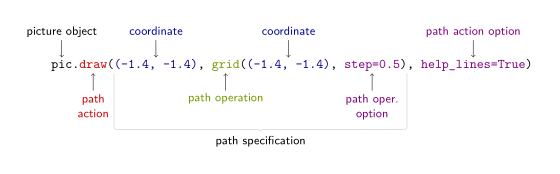

In [14]:
# brace for path specification
pic.usetikzlibrary('decorations.pathreplacing')
pic.draw('(d.base west)', '++(0,-0.4em)', lineto('+(0,-4.1em)'), coordinate('n'),
    color='lightgray')
pic.draw('(k.base east)', '++(0,-0.4em)', lineto('+(0,-4.1em)'), coordinate('o'),
    color='lightgray')
pic.draw('(n)', lineto('(o)'),
    node('path specification', pos=0.5, below='0.6em', color='black'),
    decorate=True, decoration='{brace,mirror}', color='lightgray')

# add padding around contents
pic.path('(current bounding box.north east)', '+(2em, 2em)')
pic.path('(current bounding box.south west)', '+(-2em, -2em)')

# write SVG into documentation folder
pic.write_image('docs/tikz/design.svg')

pic.demo()